# Electric Vehicle Data Analysis Project

In [4]:
# Importing Required Libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats

In [5]:
# Importing the Excel file and creating dataframe called EV_Dataset
EV_Dataset=pd.read_excel("FEV-data-Excel.xlsx")
EV_Dataset.head()

,Car full name,Make,Model,Minimal price (gross) [PLN],Engine power [KM],Maximum torque [Nm],Type of brakes,Drive type,Battery capacity [kWh],Range (WLTP) [km],...,Permissable gross weight [kg],Maximum load capacity [kg],Number of seats,Number of doors,Tire size [in],Maximum speed [kph],Boot capacity (VDA) [l],Acceleration 0-100 kph [s],Maximum DC charging power [kW],mean - Energy consumption [kWh/100 km]
0,Audi e-tron 55 quattro,Audi,e-tron 55 quattro,345700,360,664,disc (front + rear),4WD,95.0,438,...,3130.0,640.0,5,5,19,200,660.0,5.7,150,24.45
1,Audi e-tron 50 quattro,Audi,e-tron 50 quattro,308400,313,540,disc (front + rear),4WD,71.0,340,...,3040.0,670.0,5,5,19,190,660.0,6.8,150,23.80
2,Audi e-tron S quattro,Audi,e-tron S quattro,414900,503,973,disc (front + rear),4WD,95.0,364,...,3130.0,565.0,5,5,20,210,660.0,4.5,150,27.55
3,Audi e-tron Sportback 50 quattro,Audi,e-tron Sportback 50 quattro,319700,313,540,disc (front + rear),4WD,71.0,346,...,3040.0,640.0,5,5,19,190,615.0,6.8,150,23.30
4,Audi e-tron Sportback 55 quattro,Audi,e-tron Sportback 55 quattro,357000,360,664,disc (front + rear),4WD,95.0,447,...,3130.0,670.0,5,5,19,200,615.0,5.7,150,23.85


In [6]:
# Getting the Dataframe information
EV_Dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 53 entries, 0 to 52
Data columns (total 25 columns):
 #   Column                                  Non-Null Count  Dtype  
---  ------                                  --------------  -----  
 0   Car full name                           53 non-null     object 
 1   Make                                    53 non-null     object 
 2   Model                                   53 non-null     object 
 3   Minimal price (gross) [PLN]             53 non-null     int64  
 4   Engine power [KM]                       53 non-null     int64  
 5   Maximum torque [Nm]                     53 non-null     int64  
 6   Type of brakes                          52 non-null     object 
 7   Drive type                              53 non-null     object 
 8   Battery capacity [kWh]                  53 non-null     float64
 9   Range (WLTP) [km]                       53 non-null     int64  
 10  Wheelbase [cm]                          53 non-null     float64


# Task 1: A customer has a budget of 350,000 PLN and wants an EV with a minimum range of 400 km.


# a)	Your task is to filter out EVs that meet these criteria.



In [9]:
# Considering the PLN<=350000 and range>=400 for this task
Filtered_EV = EV_Dataset[(EV_Dataset["Minimal price (gross) [PLN]"] <= 350000) & (EV_Dataset["Range (WLTP) [km]"] >= 400)]
Filtered_EV

,Car full name,Make,Model,Minimal price (gross) [PLN],Engine power [KM],Maximum torque [Nm],Type of brakes,Drive type,Battery capacity [kWh],Range (WLTP) [km],...,Permissable gross weight [kg],Maximum load capacity [kg],Number of seats,Number of doors,Tire size [in],Maximum speed [kph],Boot capacity (VDA) [l],Acceleration 0-100 kph [s],Maximum DC charging power [kW],mean - Energy consumption [kWh/100 km]
0,Audi e-tron 55 quattro,Audi,e-tron 55 quattro,345700,360,664,disc (front + rear),4WD,95.0,438,...,3130.0,640.0,5,5,19,200,660.0,5.7,150,24.45
8,BMW iX3,BMW,iX3,282900,286,400,disc (front + rear),2WD (rear),80.0,460,...,2725.0,540.0,5,5,19,180,510.0,6.8,150,18.80
15,Hyundai Kona electric 64kWh,Hyundai,Kona electric 64kWh,178400,204,395,disc (front + rear),2WD (front),64.0,449,...,2170.0,485.0,5,5,17,167,332.0,7.6,100,15.40
18,Kia e-Niro 64kWh,Kia,e-Niro 64kWh,167990,204,395,disc (front + rear),2WD (front),64.0,455,...,2230.0,493.0,5,5,17,167,451.0,7.8,100,15.90
20,Kia e-Soul 64kWh,Kia,e-Soul 64kWh,160990,204,395,disc (front + rear),2WD (front),64.0,452,...,1682.0,498.0,5,5,17,167,315.0,7.9,100,15.70
22,Mercedes-Benz EQC,Mercedes-Benz,EQC,334700,408,760,disc (front + rear),4WD,80.0,414,...,2940.0,445.0,5,5,19,180,500.0,5.1,110,21.85
39,Tesla Model 3 Standard Range Plus,Tesla,Model 3 Standard Range Plus,195490,285,450,disc (front + rear),2WD (rear),54.0,430,...,NaN,NaN,5,5,18,225,425.0,5.6,150,NaN
40,Tesla Model 3 Long Range,Tesla,Model 3 Long Range,235490,372,510,disc (front + rear),4WD,75.0,580,...,NaN,NaN,5,5,18,233,425.0,4.4,150,NaN
41,Tesla Model 3 Performance,Tesla,Model 3 Performance,260490,480,639,disc (front + rear),4WD,75.0,567,...,NaN,NaN,5,5,20,261,425.0,3.3,150,NaN
47,Volkswagen ID.3 Pro Performance,Volkswagen,ID.3 Pro Performance,155890,204,310,disc (front) + drum (rear),2WD (rear),58.0,425,...,2270.0,540.0,5,5,18,160,385.0,7.3,100,15.40


# b)	Group them by the manufacturer (Make).


In [11]:
# Grouping the dataset based on the manufacturer details
Manufacturer_df=Filtered_EV.groupby("Make")

In [12]:
# Viewing the number of Electric Vehicle present for each manufacturer using value_counts() function.
Manufacturer_df_count = Manufacturer_df['Make'].value_counts()
Manufacturer_df_count

Make
Audi             1
BMW              1
Hyundai          1
Kia              2
Mercedes-Benz    1
Tesla            3
Volkswagen       3
Name: count, dtype: int64

# c)	Calculate the average battery capacity for each manufacturer.

In [14]:
# Finding the average battery capacity using mean() function
Manufacturer_df_average=Manufacturer_df["Battery capacity [kWh]"].mean()
Manufacturer_df_average

Make
Audi             95.000000
BMW              80.000000
Hyundai          64.000000
Kia              64.000000
Mercedes-Benz    80.000000
Tesla            68.000000
Volkswagen       70.666667
Name: Battery capacity [kWh], dtype: float64

# Findings:
Task 1a: We can see that there are 12 Electric Vehicles that has budget <= 350,000 PLN with a minimum range of 400 km.  

Task 1b: When grouped by manufacturers, we see that most of the Electric Vehicles are from "Tesla" and "Volkswagen" that are matching the above criteria. 

Task 1c: When we take the mean of the "Battery capacity [kWh]" column, we observe that "Audi" Manufacturer has the maximum average battery capacity, while "Hyundai and Kia" have minimum average battery capacity that are matching the above criteria.

# Task 2: You suspect some EVs have unusually high or low energy consumption. 

# Find the outliers in the mean - Energy consumption [kWh/100 km] column.

In [18]:
# Finding Outlier using z score method

# Calculating mean and standard deviation for the mean - Energy consumption [kWh/100 km] column
mean = EV_Dataset['mean - Energy consumption [kWh/100 km]'].mean()
std_dev = EV_Dataset['mean - Energy consumption [kWh/100 km]'].std()

print("Mean is", mean,"and Standard deviation is",std_dev)


Mean is 18.994318181818183 and Standard deviation is 4.418252520880443


In [19]:
# Calculating Z-scores for the mean - Energy consumption [kWh/100 km] column
EV_Dataset['Z-score'] = (EV_Dataset['mean - Energy consumption [kWh/100 km]'] - mean) / std_dev
Z_Score_List=list(EV_Dataset['Z-score'])

print(Z_Score_List)
print("\n")
print("Minimum of z score is", min(Z_Score_List), "Maximum of z score is", max(Z_Score_List))

[1.2348053427002041, 1.0876883554007841, 1.9364402052051324, 0.9745214420935377, 1.099005046731509, 1.8572233658900594, -1.3340835893742895, -1.062482997436898, -0.043980777671680064, nan, -0.7682490228380574, -0.4061149002548689, -0.3382147522705209, -1.1756499107441443, -0.904049318806753, -0.8135157881609558, 0.49922040620310243, -0.836149170822405, -0.7003488748537093, -0.7682490228380574, -0.7456156401766082, -1.0172162321139995, 0.6463373935025233, -0.5079651222313906, -0.11188092565602807, -0.4287482829163177, -0.5305985048928401, -0.3155813696090713, -0.5871819615464634, nan, 0.9971548247549865, 1.155588503385132, 1.3253388733460019, 1.381922329999625, -0.5645485788850138, -0.5645485788850138, -0.8021990968302314, -0.5984986528771874, -0.4513816655777673, nan, nan, nan, nan, nan, nan, nan, -1.1303831454212458, -0.8135157881609558, -0.7003488748537093, -0.2250478389632745, 1.4045557126610737, 2.083557192504552, 1.5629893912912185]


Minimum of z score is -1.3340835893742895 Maxi

In [20]:
# Defining a threshold for outliers as 2 since the Z-Score values are ranging from -1.33 to 2.08
outlier_threshold = 2

# Identifying outliers
outliers = EV_Dataset[abs(EV_Dataset['Z-score']) > outlier_threshold]

# Displaying outliers
print("Outlier based on Z-score are as follows:")
outliers

Outlier based on Z-score are as follows:


,Car full name,Make,Model,Minimal price (gross) [PLN],Engine power [KM],Maximum torque [Nm],Type of brakes,Drive type,Battery capacity [kWh],Range (WLTP) [km],...,Maximum load capacity [kg],Number of seats,Number of doors,Tire size [in],Maximum speed [kph],Boot capacity (VDA) [l],Acceleration 0-100 kph [s],Maximum DC charging power [kW],mean - Energy consumption [kWh/100 km],Z-score
51,Mercedes-Benz EQV (long),Mercedes-Benz,EQV (long),339480,204,362,NaN,2WD (front),90.0,356,...,865.0,6,5,17,160,NaN,NaN,110,28.2,2.083557


# Findings:

1. Have used Z-Score Method to find the outliers in the "mean - Energy consumption [kWh/100 km] column". We can see that mean is 18.9 and the standard deviation is 4.41.

2. After calculating the Z-Score, we see that the Z-Score values are ranging from -1.33 to 2.08. So setting the threshold value as 2.

3. There is one outlier in the dataset when z score is calculated on only mean - Energy consumption [kWh/100 km] column with a value of 28.2.

# Task 3: Your manager wants to know if there's a strong relationship between battery capacity and range.


# a)	Create a suitable plot to visualize.

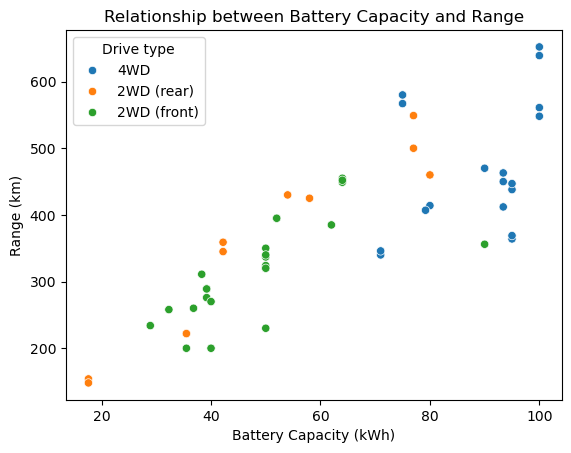

In [24]:
# Have considered "Drive Type" column for better analysis

# Creating a scatterplot
sns.scatterplot(x='Battery capacity [kWh]', y='Range (WLTP) [km]', data=EV_Dataset, hue='Drive type')

# Adding title
plt.title('Relationship between Battery Capacity and Range')

# Adding axis labels
plt.xlabel('Battery Capacity (kWh)')
plt.ylabel('Range (km)')

# Showing the plot
plt.show()


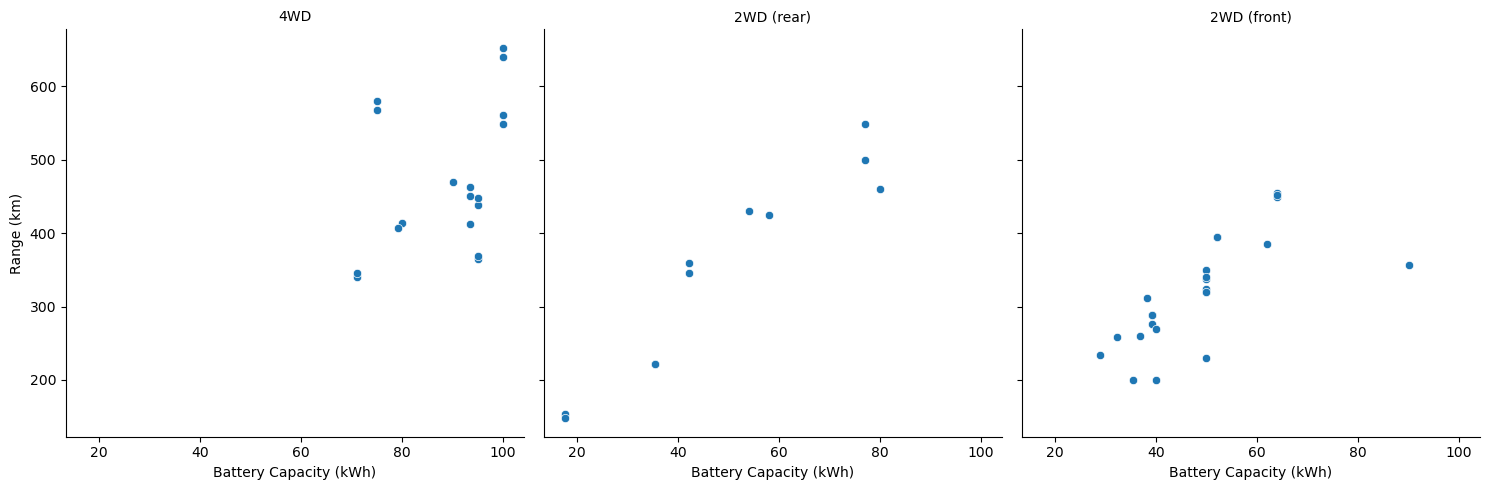

In [25]:
# Creating a FacetGrid
g = sns.FacetGrid(EV_Dataset, col='Drive type', height=5, aspect=1)

# Mapping the scatterplot to the grid
g.map(sns.scatterplot, 'Battery capacity [kWh]', 'Range (WLTP) [km]')

# Adding titles and labels
g.set_axis_labels('Battery Capacity (kWh)', 'Range (km)')
g.set_titles('{col_name}')

# Displaying the plot
plt.show()


In [26]:
# Calculating Correlation  between 'Battery Capacity (kWh)' and 'Range (km)'
correlation = EV_Dataset['Battery capacity [kWh]'].corr(EV_Dataset['Range (WLTP) [km]'])

# Printing the correlation value
print(f"Correlation coefficient between Battery Capacity and Range: {correlation}")


Correlation coefficient between Battery Capacity and Range: 0.8104385771936846


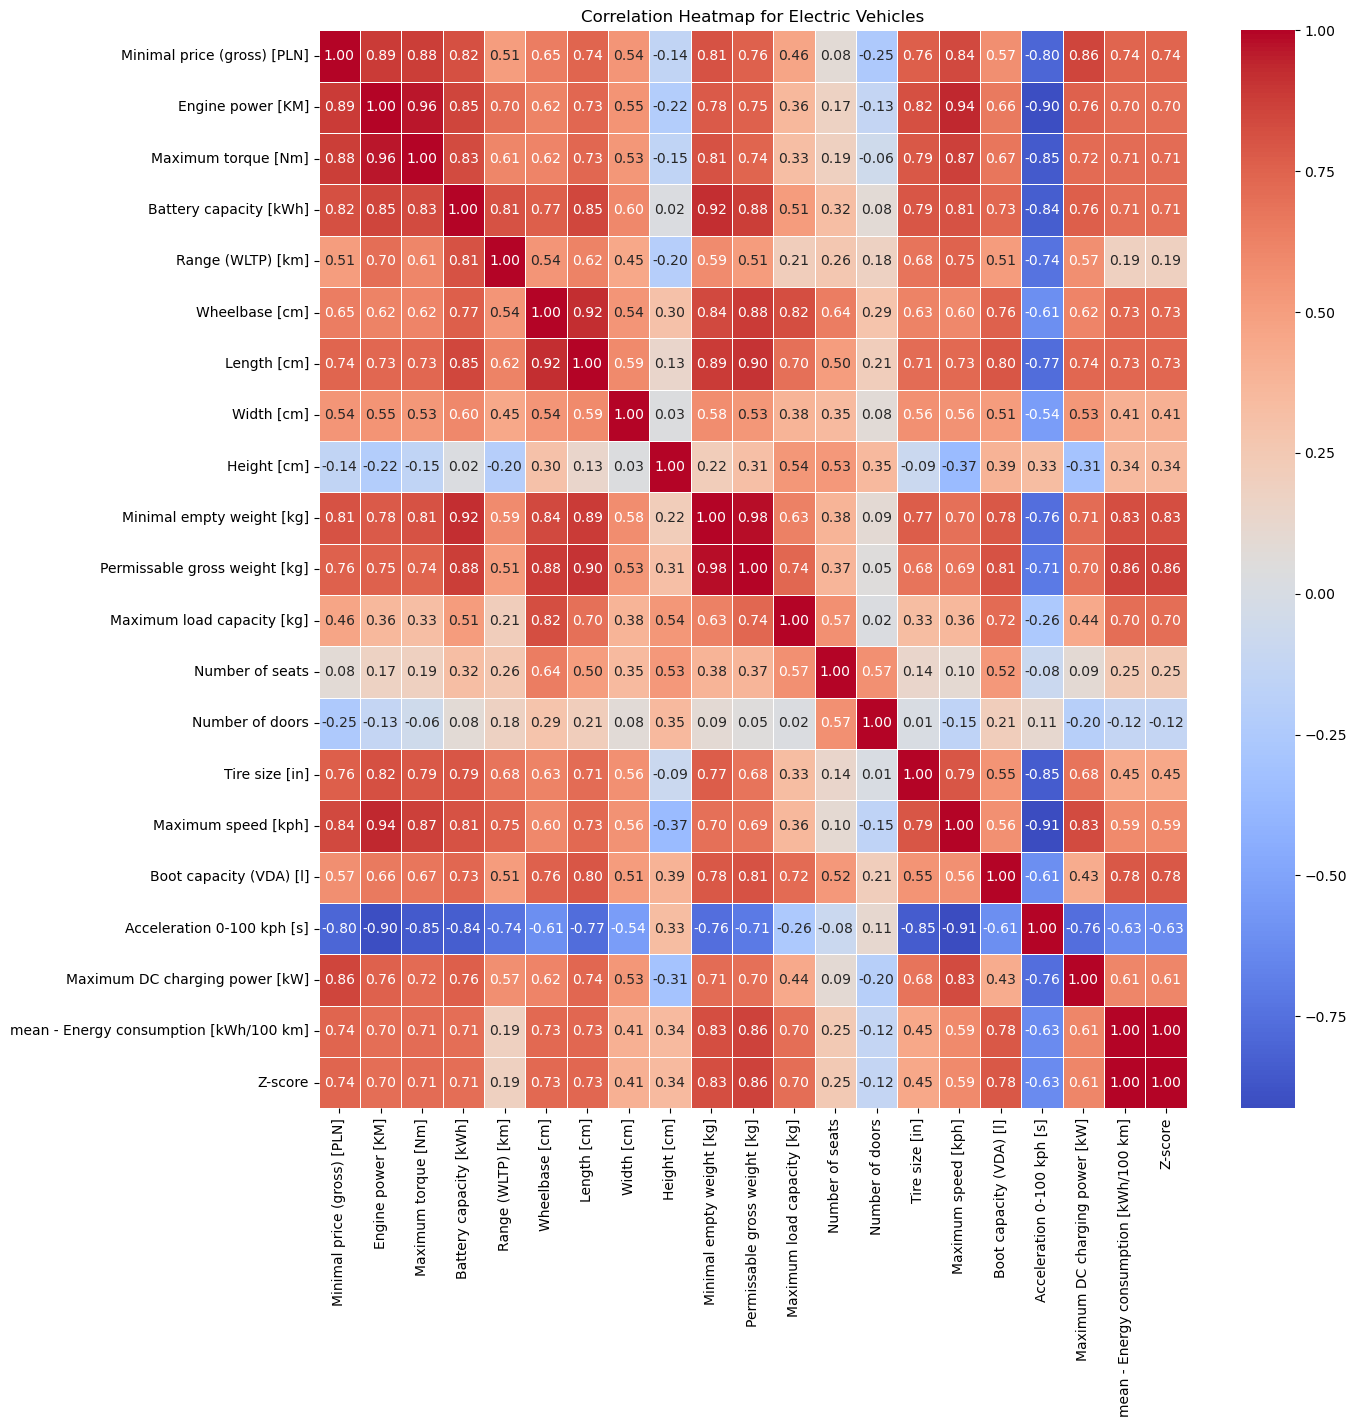

In [27]:
# Creating a heatmap with corr() function by generating correlation matrix

# Dropping non-numeric columns for correlation calculation (e.g., Car full name, Make, Model, Type of brakes, Drive type)
EV_Dataset_numeric_df = EV_Dataset.select_dtypes(include=['float64', 'int64'])

# Calculating the correlation matrix for the EV dataset
corr_matrix = EV_Dataset_numeric_df.corr()

# Create a heatmap
plt.figure(figsize=(14, 14))  # Set figure size
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)

# Display the heatmap
plt.title("Correlation Heatmap for Electric Vehicles")
plt.show()


# b) Highlight any insights


1. When Scatterplot was used to show the relationship between battery capacity and range with their repsective Drive types. We can observe that as the battery capacity is increasing, the range is also increasing. This indicates that there is a positive relationship between battery capacity and range of electric vehicle.

2. When Facet Grid was used, the analysis becomes much more clearer than before. We can find that for "4WD drive type", most of the electric vehicles have Battery Capacity within 75 to 100 kWH. While "2WD(rear) drive type", most of the electric vehicles have Battery Capacity within 20 to 80 kWH. Whereas "2WD(front) drive type", most of the electric vehicles have Battery Capacity within 35 to 65 kWH.

3. When we use correlation function, we get the value as 0.81 which is very close to 1. This indicates that there is a strong positive correlation between battery capacity and range of the electric vehicle.

4. Using Heatmap with correlation function on numerical columns of EV dataset, we can observe that Minimal empty weight and Permissible gross weight have strong positive correlation between them as the value 0.98 which is very close to 1. Engine power and Maximum torque have strong positive correlation between them as the value 0.96 which is very close to 1. Engine power and Maximum speed have strong positive correlation between them as the value 0.94 which is very close to 1.

5. Similarly, Acceleration and Maximum speed have strong negative correlation between them as the value -0.91 which is very close to -1. Acceleration and Engine power have strong negative correlation between them as the value -0.90 which is very close to -1.

6. Similarly, Maximum Load Capacity and Number of Doors have zero correlation between them as the value 0.02 which is very close to 0. Battery Capacity and Height have zero correlation between them as the value 0.02 which is very close to 0. 

# Task 4: Build an EV recommendation class. The class should allow users to input their budget, desired range, and battery capacity. The class should then return the top three EVs matching their criteria. 

In [31]:
# Creating EV_Recommendation_Class 

class EV_Recommendation_Class:
    
    # Creating init method
    def __init__(self, data):
        self.data = data

    
    # Creating Top3EV method
    def Top3EV(self):

        # Accepting user input for budget, range and battery capacity
        try:
            budget = float(input("Enter your budget:"))
            drange = float(input("Enter your desired range:"))
            capacity = float(input("Enter your desired battery capacity: "))
        except ValueError:
            print("Please enter valid values.")
            return None
        
        # Filtering EVs that meet the budget, drange and capacity criteria
        Filtered_EV_New = self.data[(self.data['Minimal price (gross) [PLN]'] <= budget) & (self.data['Range (WLTP) [km]'] >= drange) &
                          (self.data['Battery capacity [kWh]'] >= capacity)]
        
        # Sorting by Range, Battery Capacity and Price to get the top 3 EVs
        Sorted_EV = Filtered_EV_New.sort_values(by=['Range (WLTP) [km]', 'Battery capacity [kWh]','Minimal price (gross) [PLN]'], ascending=[False, False, False])
        
        # Get top 3 EVs
        Top_3_EV = Sorted_EV.head(3)
        
        return Top_3_EV

In [32]:
# Creating an object of the EV_Recommendation class
EV_Rec = EV_Recommendation_Class(EV_Dataset)

# Getting the top 3 EV recommendations
Recommendations = EV_Rec.Top3EV()

# Displaying the recommendations
print("Top 3 EVs based on user input for budget, range and battery capacity are as follows:")
Recommendations  

Enter your budget: 180000
Enter your desired range: 200
Enter your desired battery capacity:  20


Top 3 EVs based on user input for budget, range and battery capacity are as follows:


,Car full name,Make,Model,Minimal price (gross) [PLN],Engine power [KM],Maximum torque [Nm],Type of brakes,Drive type,Battery capacity [kWh],Range (WLTP) [km],...,Maximum load capacity [kg],Number of seats,Number of doors,Tire size [in],Maximum speed [kph],Boot capacity (VDA) [l],Acceleration 0-100 kph [s],Maximum DC charging power [kW],mean - Energy consumption [kWh/100 km],Z-score
48,Volkswagen ID.3 Pro S,Volkswagen,ID.3 Pro S,179990,204,310,disc (front) + drum (rear),2WD (rear),77.0,549,...,412.0,5,5,19,160,385.0,7.9,125,15.9,-0.700349
18,Kia e-Niro 64kWh,Kia,e-Niro 64kWh,167990,204,395,disc (front + rear),2WD (front),64.0,455,...,493.0,5,5,17,167,451.0,7.8,100,15.9,-0.700349
20,Kia e-Soul 64kWh,Kia,e-Soul 64kWh,160990,204,395,disc (front + rear),2WD (front),64.0,452,...,498.0,5,5,17,167,315.0,7.9,100,15.7,-0.745616


# Findings

1. While creating EV_Recommendation_Class, have created 2 methods called init and Top3EV. In Init method, assigned the entire dataframe. In Top3EV method, user inputs are accepted and based on the values, top 3 Electric Vehicles are returned from the method.

2. Created an object called EV_Rec for EV_Recommendation class. Top3EV method is called using EV_Rec Object. Top 3 Electric Vehicles are displayed based on user inputs.

3. For user inputs as 180000, 200 and 20, we get 3 Electric Vehicles from Volkswagen and Kia Manufacturers. So user can decide to choose the required Electric vehicle from any of these 3 Electric Vehicles.

# Task 5: Inferential Statistics – Hypothesis Testing: Test whether there is a significant difference in the average Engine power [KM] of vehicles manufactured by two leading manufacturers i.e. Tesla and Audi.
# (Conduct a two sample t-test using ttest_ind from scipy.stats module) 


In [35]:
# Setting Null Hypothesis, H0 and Alternative Hypothesis, H1
H0 = "There is no significant difference between the average engine power of Tesla and Audi Electric Vehicles."
H1 = "There is a significant difference between the average engine power of Tesla and Audi Electric Vehicles."

# Splitting the EV_Dataset based on Make column
tesla_avg_engine_power = EV_Dataset[EV_Dataset['Make'] == 'Tesla']['Engine power [KM]']
audi_avg_engine_power = EV_Dataset[EV_Dataset['Make'] == 'Audi']['Engine power [KM]']

# Performing an Independent Two-Sample t-test on tesla and audi manufacturers
t_statistics, p_value = stats.ttest_ind(tesla_avg_engine_power, audi_avg_engine_power)

# Defining the significance level, alpha as 0.05(taking 95% of Confidence Interval)
alpha = 0.05

In [36]:
# Performing Hypothesis testing
print(f"T-statistic: {t_statistics}")
print(f"P-value: {p_value}")

# Interpretting the result
if p_value < alpha:
    print(f"Rejecting the null hypothesis and Accepting Alternative Hypothesis:{H1}")
else:
    print(f"Failing to reject the null hypothesis and Accepting Null Hypothesis:{H0}")


T-statistic: 1.7024444538261416
P-value: 0.11672692675082785
Failing to reject the null hypothesis and Accepting Null Hypothesis:There is no significant difference between the average engine power of Tesla and Audi Electric Vehicles.


# What insights can you draw from the test results?

1. The p-value that we have got from T-Test is 0.116 which is greater than the alpha which is 0.05.

2. In this case, we have strong evidence that there is no difference between the average engine power of Tesla and Audi Electric Vehicles.

3. So we will accept the null hypothesis(H0) and reject the alternative Hypothesis(H1).

4. We conclude that the average engine power of Tesla and Audi Electric Vehicles is not different from each other or there is no difference in their mean average engine power.

# Recommendations and Conclusion: Provide actionable insights based on your analysis.


# Conclusion:

1. In Task1, there are 12 Electric Vehicles that has budget<=3,50,000 PLN with a minimum range of 400 km where Audi has maximum average battery capacity while Hyundai & Kia has minimum average battery capacity.

2. In Task2, found an outlier when z score is calculated on only mean-Energy consumption in KWH/100 KM column.

3. In Task 3, we can conclude that features Minimal empty weight and Permissible gross weight; Engine power and Maximum torque; Engine power and Maximum speed have strong positive correlation between them. Whereas Acceleration and Maximum speed; Acceleration and Engine power have strong negative correlation between them. Also, Maximum Load Capacity and Number of Doors; Battery Capacity and Height have zero correlation between them.

5. In Task 4, by creating EV_Recommendation class, there is flexibility of getting the required results based on users input for budget, range and battery capacity. This will in turn help in choosing the right electric vehicle for the users as it is user friendly and a helper class.

6. In Task 5, performing hypothesis testing on the average engine power of Tesla and Audi Electric vehicles states that there is no difference in their mean engine power.

# Recommendation:

1. Audi Electric Vehicles can be recommended to the users who can afford Electric Vehicles priced with 3,50,000 and need minimum range of 400 km.

2. Since there is a strong relationship between Minimal empty weight and Permissible gross weight, Engine power and Maximum torque; Engine power and Maximum speed of the electric vehicles, we can highlight these features more to users during their selection process of electric vehicles.

3. To get the customised features based on the budget, range and battery capacity of users, EV Recommendation class can be of great help.

4. For users who prefer more for engine power of electric vehicles can be suggested to choose between any of the electric vehicles from Tesla or Audi,as the average engine power of Tesla and Audi Electric vehicles are same.